In [3]:
# Importing Necessary Libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# read the sales file first 
sales_data = pd.read_csv("Sales Transaction v.4a.csv")# I have uploaded this csv file in my home directory 
# you may have to check this location of file 


In [19]:
#check few top and bottom values
sales_data.head(5)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12-09-2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12-09-2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12-09-2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12-09-2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12-09-2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [23]:
sales_data.tail(5)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
536345,C536548,12-01-2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12-01-2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12-01-2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12-01-2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany
536349,C536548,12-01-2018,22767,Triple Photo Frame Cornice,20.45,-2,12472.0,Germany


###### observation from above is that few values in Quanity column seem to have negative values !
###### On reading about this data , we got to know that negative quantity values are corresponding to the sales cancelation !
###### This can also be identified, as we see a  "C" alphabet in front of the transactionno data 
###### These peculiarities of data should be considered while processing!

In [32]:
# knwo the shape of data, i.e. number of rows and columns
sales_data.shape


(536350, 8)

##### This raw data without any cleaning activity has 536350 rows and 8 columns 

In [35]:
# lets look at the columns info and datatypes 
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


##### Few observations on data types :
- ProductNo and TransactionNo  columns have been kept as String/ object data, we need to find out why ?
- The date column is object , which is incoorrect , it needs to be changed to date type
- The customerNo column is float, which can be changed to integer , as there are no need of any decimal places
- The Quanity is in integers , so there is no qty in fractions 

In [53]:
# checking why teh transactionno column is object datatype ? does it have non numeric values ?
is_numeric_series = sales_data['TransactionNo'].astype(str).str.isnumeric()

# Check if there are ANY False values (meaning, any non-numeric strings)
are_there_non_numeric = ~is_numeric_series.all()

if are_there_non_numeric:
    print("Yes, there are non-numeric values in the 'TransactionNo' column.")
else:
    print("No, all values in the 'TransactionNo' column appear to be numeric strings.")


Yes, there are non-numeric values in the 'TransactionNo' column.


In [57]:
# silimarly checking whether the productno column is object data type ? Does this also have some non numeric values ?
is_numeric_series = sales_data['ProductNo'].astype(str).str.isnumeric()

# Check if there are ANY False values (meaning, any non-numeric strings)
are_there_non_numeric = ~is_numeric_series.all()

if are_there_non_numeric:
    print("Yes, there are non-numeric values in the 'ProductNo' column.")
else:
    print("No, all values in the 'ProductNo' column appear to be numeric strings.")


Yes, there are non-numeric values in the 'ProductNo' column.


##### So both the above ouputs confirm that the data in these columns has non numeric values also, hence they have been kept as object type 

In [73]:
##### Check whether there are any null values ?
null_values = sales_data.isna().any()
print(null_values)

TransactionNo    False
Date             False
ProductNo        False
ProductName      False
Price            False
Quantity         False
CustomerNo        True
Country          False
dtype: bool


###### This confirms that there are null values in customerNo
###### need to check how many records are having null values 

In [81]:
null_val_count = sales_data['CustomerNo'].isna().sum()
null_val_count

55

##### There are 55 records in CustomerNo column which have null values
##### Since these records are very low ( 55 / 536350) , i.e just 0.01 % , we easily take a call to delete them as it will not effect our anlaysis and recommendation in any way !

In [84]:
# deleting the null values from the main file itself 
sales_data.dropna(inplace=True)
# confirm whether 55 records have been deleted 
sales_data.shape 


(536295, 8)

we see that the number of records are now 536295 which confirms that 55 records have been deleted 

In [87]:
##### Once again confirm and Check whether there are any null values ?
null_values = sales_data.isna().any()
print(null_values)

TransactionNo    False
Date             False
ProductNo        False
ProductName      False
Price            False
Quantity         False
CustomerNo       False
Country          False
dtype: bool


##### Confirmed that now there are no null values 

##### Data Cleaning activities
###### One of the Data Cleaning activities is to have the correct data types 
###### Lets change the datecolumn data to the right "date" format and change the CustomerNo to integer typw 

In [96]:
# astype
# we had to use, format = Mixed as the data was very inconsitent in format 
sales_data['Date'] = pd.to_datetime(sales_data['Date'], format='mixed', dayfirst=False, errors='coerce')
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536295 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  536295 non-null  object        
 1   Date           536295 non-null  datetime64[ns]
 2   ProductNo      536295 non-null  object        
 3   ProductName    536295 non-null  object        
 4   Price          536295 non-null  float64       
 5   Quantity       536295 non-null  int64         
 6   CustomerNo     536295 non-null  float64       
 7   Country        536295 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


##### Check whether there are any Duplicate values 


In [101]:
# Show all rows that are duplicates (excluding the first occurrence)
sales_data[sales_data.duplicated()]


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
985,581497,2019-12-09,21481,Fawn Blue Hot Water Bottle,7.24,1,17497.0,United Kingdom
1365,581538,2019-12-09,23275,Set Of 3 Hanging Owls Ollie Beak,6.19,1,14446.0,United Kingdom
1401,581538,2019-12-09,22992,Revolver Wooden Ruler,6.19,1,14446.0,United Kingdom
1406,581538,2019-12-09,22694,Wicker Star,6.19,1,14446.0,United Kingdom
1409,581538,2019-12-09,23343,Jumbo Bag Vintage Christmas,6.19,1,14446.0,United Kingdom
...,...,...,...,...,...,...,...,...
535227,536559,2018-12-01,51014L,Feather Pen Light Pink,11.12,12,17873.0,United Kingdom
535310,536569,2018-12-01,22111,Scottie Dog Hot Water Bottle,15.32,1,16274.0,United Kingdom
535327,536569,2018-12-01,21809,Christmas Hanging Tree With Bell,11.53,1,16274.0,United Kingdom
535960,536592,2018-12-01,82613A,Metal Sign Cupcake Single Hook,12.82,1,16592.0,United Kingdom


In [103]:
# to check number of duplicate records 
sales_data.duplicated().sum()

5200

##### There are 5200 records having duplicate records , so we need to delete them.!

In [108]:
# Drop duplicate rows and keep the first occurrence
sales_data = sales_data.drop_duplicates()
sales_data.shape

(531095, 8)

##### We can see that now the records have come down to 531095 ( after deleting 5200 rows from earlier file which had 536,295 records )

In [111]:
# check whether there are any duplicate values now ?
sales_data.duplicated().sum()

0

#### Feature Engineering activities 
#### Create / add new columns of year  / month and week 

In [124]:
# Assuming 'Date' is already a datetime column, add year month and week columns 
sales_data['Year'] = sales_data['Date'].dt.year
sales_data['Month'] = sales_data['Date'].dt.month
sales_data['Week'] = sales_data['Date'].dt.isocalendar().week
sales_data.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Year,Month,Week
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,2019,12,50
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,2019,12,50
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,2019,12,50
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,2019,12,50
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,2019,12,50


In [128]:
sales_data.shape

(531095, 11)

##### Check for any outliers in Price and Quantity columns 

<Axes: >

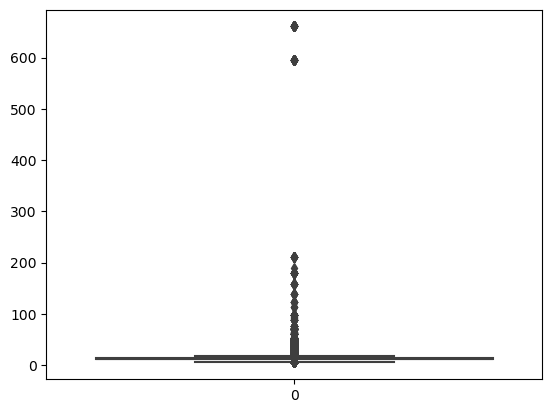

In [148]:
sns.boxplot(data=sales_data['Price']) 

<Axes: >

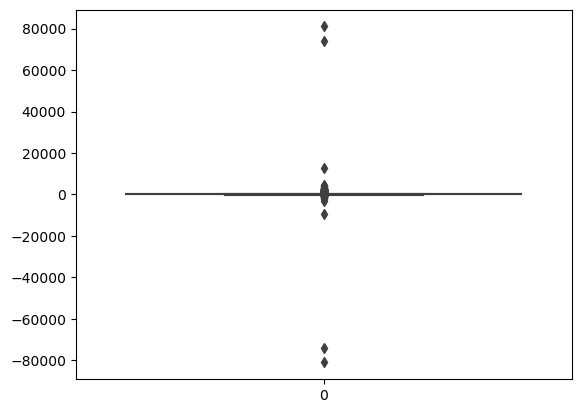

In [137]:
sns.boxplot(data=sales_data['Quantity'])

In [139]:
##### Confirm using descibe also
sales_data.describe()

,Date,Price,Quantity,CustomerNo,Year,Month,Week
count,531095,531095.000000,531095.000000,531095.000000,531095.000000,531095.000000,531095.0
mean,2019-07-04 00:29:26.409399296,12.669635,9.993146,15222.612241,2018.921743,7.552238,30.995059
min,2018-12-01 00:00:00,5.130000,-80995.000000,12004.000000,2018.000000,1.000000,1.0
25%,2019-03-28 00:00:00,10.990000,1.000000,13798.000000,2019.000000,5.000000,19.0
50%,2019-07-20 00:00:00,11.940000,3.000000,15146.000000,2019.000000,8.000000,34.0
75%,2019-10-19 00:00:00,14.090000,10.000000,16727.000000,2019.000000,11.000000,45.0
max,2019-12-09 00:00:00,660.620000,80995.000000,18287.000000,2019.000000,12.000000,51.0
std,NaN,8.526181,217.710261,1716.633588,0.268576,3.508959,15.163434


##### There are a few outliers on price - higher side and on Quantity on each side 

In [145]:
# Negative prices
sales_data[sales_data['Price'] < 0].sum

<bound method DataFrame.sum of Empty DataFrame
Columns: [TransactionNo, Date, ProductNo, ProductName, Price, Quantity, CustomerNo, Country, Year, Month, Week]
Index: []>

###### so there no negative price values !